In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from librosa import hz_to_note

In [3]:
# reading in audio date for the C major scale
sample_rate, audio_data = wav.read("../chords/CMajorScale.wav")

# if we have stereo input, pick out only one channel
if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]

# Perform Fourier Transform
# Note: Contains complex numbers representing the frequency components
fft_result = fft(audio_data)

# Calculate Frequencies
fft_freq = fftfreq(len(audio_data), d=1/sample_rate)

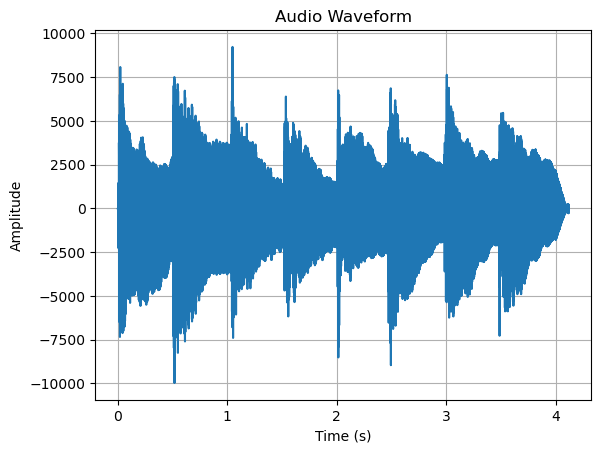

In [4]:
# Time domain Plot
time = np.arange(len(audio_data)) / sample_rate  # Create time axis
plt.plot(time, audio_data, color='tab:blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.grid(which='major')
plt.show()

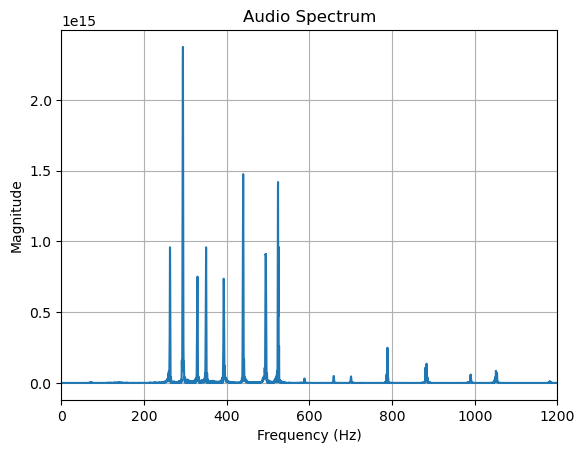

In [5]:
# Isolating positive frequencies
# Note: only first half of values are unique/positive
n = len(fft_freq) - 1
abs_fft_result = abs(fft_result)**2
pos_fft_freq = fft_freq[:n // 2]
pos_fft_result = abs_fft_result[:n // 2]

# Frequency Domain Plot
plt.plot(pos_fft_freq, pos_fft_result, color='tab:blue')  # Plot absolute values of frequency components
plt.xlim(0, 1200)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Audio Spectrum")
plt.grid(which='major')
plt.show()